**Recopiez ce notebook et envoyez-moi le lien à la fin de la séance.**

Votre **nom**:PHAM


Votre **prénom**: Duc Thinh


*Observations/commentaires éventuels de l'étudiant à l'enseignant*:Prof. Emmanuel Viennet



## Example 1: optimization of linear model by gradient descent in pure Python

This example illustrates the principle of gradient descent. We optimise a linear model (only one parameter w) with quadratic cost.

Pure python, without any framework.

*Emmanuel Viennet, 2019-12-15*, *2022-01-11*.

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt

# Data: inputs x (scalar real values), target outputs y
x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0] # ie for x=1, we want y=2...

Le modèle va calculer la sortie $y$ en fonction de l'entrée $x$. 

Un modèle linéaire (sans biais) va calculer simplement $f(x) = w . x$.

On appelle $w$ le poids (paramètre).

**Question**: Quel est selon vous la meillerue valeur de $w$ (un nombre réel) compte tenu des données (exemple) ci-dessus (x_data, y_data) ?
Answer: w=2;

### The model

On code un "modèle" très simple, come si c'était un réseau de neurone avec un seul poids ! 

On a ici les trois méthodes principales de tout modèle de réseu de neuronne:
 - la passe avant (*formward*) qui calcule la sortie en fonction de l'entrée
 - la fonction de coût (cost) qui mesure l'écart entre la sortie prévue (y_pred) et la sortie désirée (y).
 - le calcul du gradient du coût par rapprt au paramètre.

In [ ]:
def forward(x):
    "Computes the output (forward pass)"
    return x * w

def cost(x, y):
    "Cost function"
    y_pred = forward(x)
    return (y_pred - y) * (y_pred - y)

def gradient(x, y):  # d_loss/d_w
    "Computes the gradient of the cost with respect to the parameter w"
    return 2 * x * (x * w - y)


### Learning the parameter

Ici on va "apprendre" le paramètre $w$ par descente du gradient (stpochastique).

Before learning: f(4) = 4.0
	gradient at (1.0,2.0) = -2.0
	gradient at (2.0,4.0) = -7.84
	gradient at (3.0,6.0) = -16.2288
After epoch: 0 w= 1.260688 loss= 7.315943039999998
	gradient at (1.0,2.0) = -1.478624
	gradient at (2.0,4.0) = -5.796206079999999
	gradient at (3.0,6.0) = -11.998146585599997
After epoch: 1 w= 1.453417766656 loss= 3.9987644858206908
	gradient at (1.0,2.0) = -1.093164466688
	gradient at (2.0,4.0) = -4.285204709416961
	gradient at (3.0,6.0) = -8.87037374849311
After epoch: 2 w= 1.5959051959019805 loss= 2.1856536232765476
	gradient at (1.0,2.0) = -0.8081896081960389
	gradient at (2.0,4.0) = -3.1681032641284723
	gradient at (3.0,6.0) = -6.557973756745939
After epoch: 3 w= 1.701247862192685 loss= 1.1946394387269013
	gradient at (1.0,2.0) = -0.59750427561463
	gradient at (2.0,4.0) = -2.3422167604093502
	gradient at (3.0,6.0) = -4.848388694047353
After epoch: 4 w= 1.7791289594933983 loss= 0.6529686924601721
	gradient at (1.0,2.0) = -0.44174208101320334
	gradient at (2.0,4

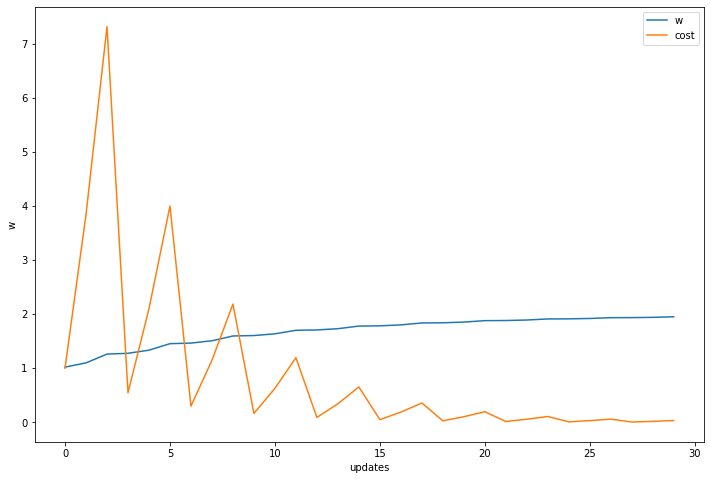

In [ ]:
w = 1.0  # initial value of the parameter (chosen randomly)
num_epochs = 10
learning_rate = 0.01
wlist = []
Llist = []

# Before training, print value for x=4
print("Before learning: f({}) = {}".format(4, forward(4)))

# Learning loop
for epoch in range(num_epochs):
    for x_val, y_val in zip(x_data, y_data): # take each example
        l = cost(x_val, y_val)
        grad = gradient(x_val, y_val)
        w = w - learning_rate * grad           # gradient descent
        print("\tgradient at ({},{}) = {}".format(x_val, y_val, grad))
        Llist.append(l)
        wlist.append(w)
        
    print("After epoch:", epoch, "w=", w, "loss=", l)

print("After learning: f({}) = {}".format(4, forward(4)))
plt.figure(figsize=(12,8))
plt.plot(wlist, label="w")
plt.plot(Llist, label="cost")
plt.xlabel("updates")
plt.ylabel("w")
plt.legend()
plt.show()

## Questions

- What is the initial value of the parameter $w$ ? R: w = 1

- What is the learning rate ? R: is a configurable hyperparameter used in the training of neural networks that has a small positive value, often in the range between 0.0 and 1.0. The learning rate controls how quickly the model is adapted to the problem.

- Are you convinced that the optimal weight value is $2$ ?  R: Can not, it is approximately 2

- How many epochs are required to get a difference $|w-2| < 0.05$ ? R: 9 epoches

- Try several learning rates (smaller or higher). What do you observe ?
R: In the case that the learning rate higher, you can see that it move very fast and out of the convergence point. It leads to the w and coss are both modify very big.
R: In the case that the learning rate smaller, the convergence of cost and lost is slower. So, you need to increase the number of epoch in this case.

Bien expliquer ce que vous faites.

Before learning: f(4) = 4.0
	gradient at (1.0,2.0) = -2.0
	gradient at (2.0,4.0) = -3.1999999999999993
	gradient at (3.0,6.0) = 10.079999999999993
After epoch: 0 w= -0.4639999999999982 loss= 2.822399999999996
	gradient at (1.0,2.0) = -4.927999999999996
	gradient at (2.0,4.0) = -7.884799999999995
	gradient at (3.0,6.0) = 24.837119999999985
After epoch: 1 w= -4.071295999999996 loss= 17.135625830399977
	gradient at (1.0,2.0) = -12.142591999999992
	gradient at (2.0,4.0) = -19.428147199999987
	gradient at (3.0,6.0) = 61.19866367999995
After epoch: 2 w= -12.95967334399999 loss= 104.03545656160404
	gradient at (1.0,2.0) = -29.91934668799998
	gradient at (2.0,4.0) = -47.87095470079997
	gradient at (3.0,6.0) = 150.79350730751992
After epoch: 3 w= -34.86063511961598 loss= 631.6300512806406
	gradient at (1.0,2.0) = -73.72127023923196
	gradient at (2.0,4.0) = -117.95403238277115
	gradient at (3.0,6.0) = 371.55520200572914
After epoch: 4 w= -88.82460493473378 loss= 3834.8130038199492
	gradient at (

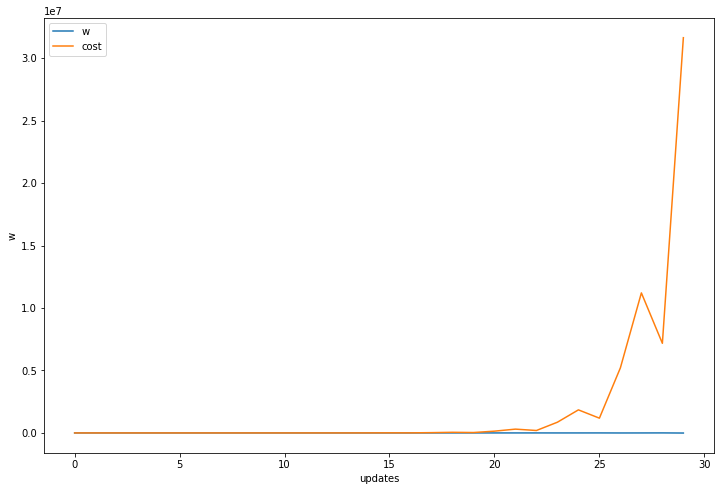

In [ ]:
######## We choose higher learning rate
w = 1.0  # initial value of the parameter (chosen randomly)
num_epochs = 10
learning_rate = 0.3
wlist = []
Llist = []

# Before training, print value for x=4
print("Before learning: f({}) = {}".format(4, forward(4)))

# Learning loop
for epoch in range(num_epochs):
    for x_val, y_val in zip(x_data, y_data): # take each example
        l = cost(x_val, y_val)
        grad = gradient(x_val, y_val)
        w = w - learning_rate * grad        
        print("\tgradient at ({},{}) = {}".format(x_val, y_val, grad))
        Llist.append(l)
        wlist.append(w)
        
    print("After epoch:", epoch, "w=", w, "loss=", l)

print("After learning: f({}) = {}".format(4, forward(4)))
plt.figure(figsize=(12,8))
plt.plot(wlist, label="w")
plt.plot(Llist, label="cost")
plt.xlabel("updates")
plt.ylabel("w")
plt.legend()
plt.show()

Before learning: f(4) = 4.0
	gradient at (1.0,2.0) = -2.0
	gradient at (2.0,4.0) = -7.984
	gradient at (3.0,6.0) = -17.820288
After epoch: 0 w= 1.027804288 loss= 8.821185122304001
	gradient at (1.0,2.0) = -1.944391424
	gradient at (2.0,4.0) = -7.7620105646079995
	gradient at (3.0,6.0) = -17.324807580205054
After epoch: 1 w= 1.054835497568813 loss= 8.337471046975848
	gradient at (1.0,2.0) = -1.890329004862374
	gradient at (2.0,4.0) = -7.546193387410597
	gradient at (3.0,6.0) = -16.843103640700452
After epoch: 2 w= 1.0811151236017864 loss= 7.880281673649356
	gradient at (1.0,2.0) = -1.8377697527964272
	gradient at (2.0,4.0) = -7.336376853163337
	gradient at (3.0,6.0) = -16.374793136260568
After epoch: 3 w= 1.1066640633440068 loss= 7.448162507092395
	gradient at (1.0,2.0) = -1.7866718733119864
	gradient at (2.0,4.0) = -7.13239411826145
	gradient at (3.0,6.0) = -15.919503671959557
After epoch: 4 w= 1.1315026330075397 loss= 7.039738810042606
	gradient at (1.0,2.0) = -1.7369947339849205
	gra

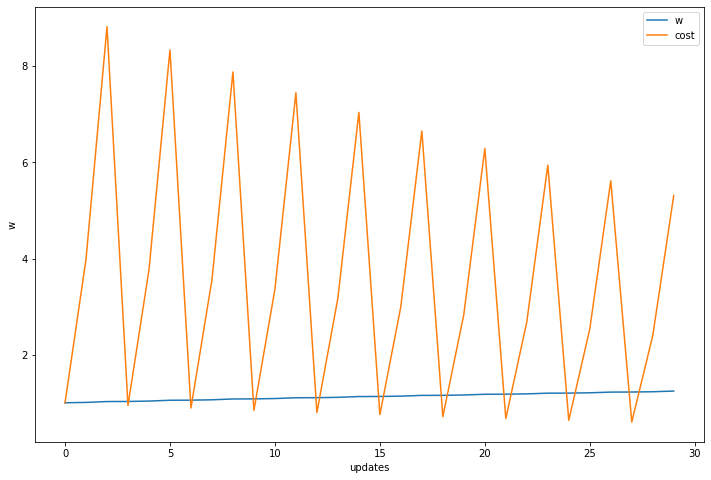

In [ ]:
######## We choose lowe learning rate
w = 1.0  # initial value of the parameter (chosen randomly)
num_epochs = 10
learning_rate = 0.001
wlist = []
Llist = []

# Before training, print value for x=4
print("Before learning: f({}) = {}".format(4, forward(4)))

# Learning loop
for epoch in range(num_epochs):
    for x_val, y_val in zip(x_data, y_data): # take each example
        l = cost(x_val, y_val)
        grad = gradient(x_val, y_val)
        w = w - learning_rate * grad        
        print("\tgradient at ({},{}) = {}".format(x_val, y_val, grad))
        Llist.append(l)
        wlist.append(w)
        
    print("After epoch:", epoch, "w=", w, "loss=", l)

print("After learning: f({}) = {}".format(4, forward(4)))
plt.figure(figsize=(12,8))
plt.plot(wlist, label="w")
plt.plot(Llist, label="cost")
plt.xlabel("updates")
plt.ylabel("w")
plt.legend()
plt.show()